In [5]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

In [6]:
#load HUDF f105w band image
filename = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
data = fits.getdata(filename).astype(np.float32)   # original
data64 = data.astype(np.float64)                   # double precision for SEP



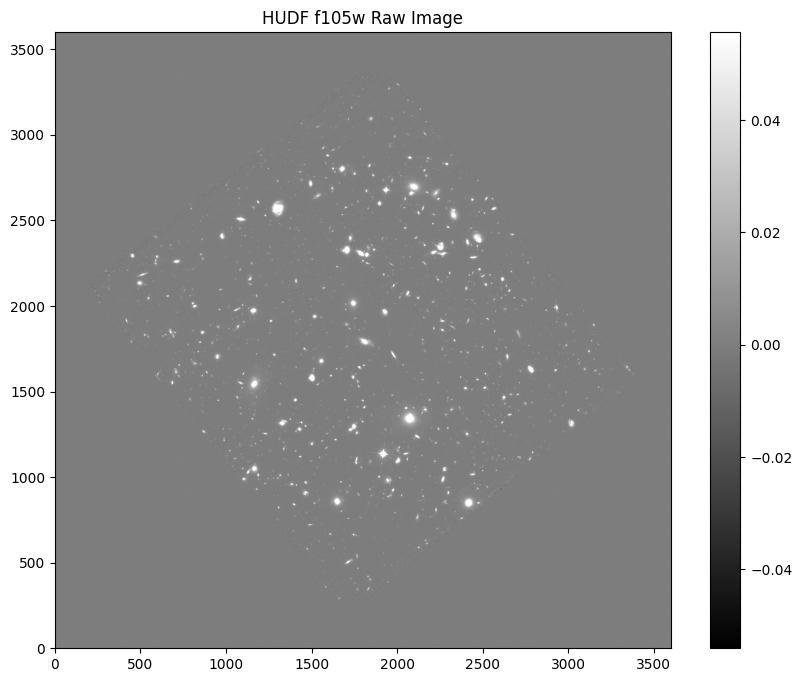

In [7]:
m, s = np.mean(data), np.std(data)

plt.imshow(
    data,
    cmap='gray',
    origin='lower',
    vmin=m - s,
    vmax=m + s
)
plt.colorbar()
plt.title("HUDF f105w Raw Image")
plt.savefig("hudf_f105w_raw.png", dpi=150)
plt.show()


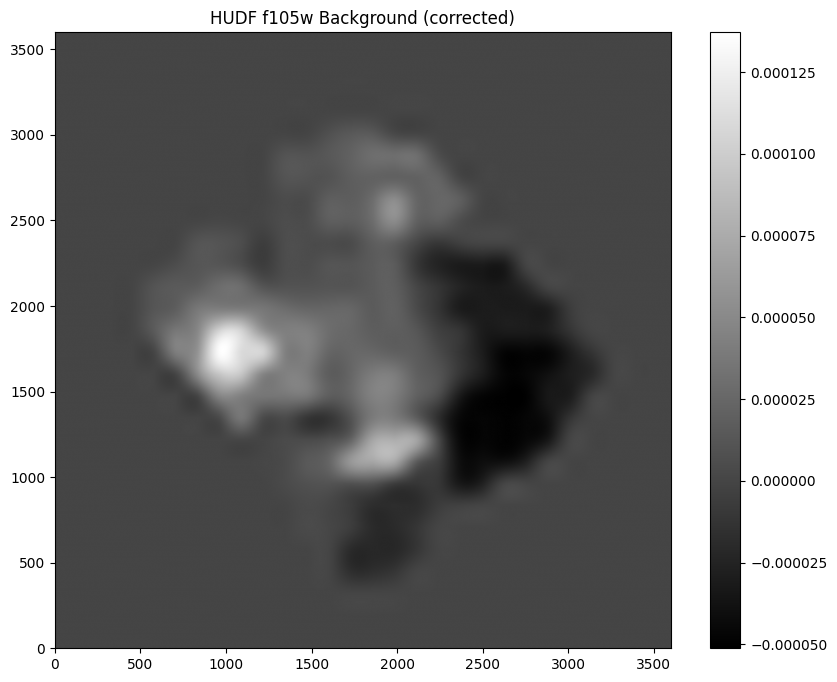

In [8]:
# estimate background with larger mesh size
bkg = sep.Background(
    data64,
    bw=128,   # background box width
    bh=128,   # background box height
    fw=5,     # filter width
    fh=5      # filter height
)

bkg_image = bkg.back()

plt.imshow(bkg_image, cmap='gray', origin='lower')
plt.colorbar()
plt.title("HUDF f105w Background (corrected)")
plt.savefig("hudf_f105w_background.png", dpi=150)
plt.show()


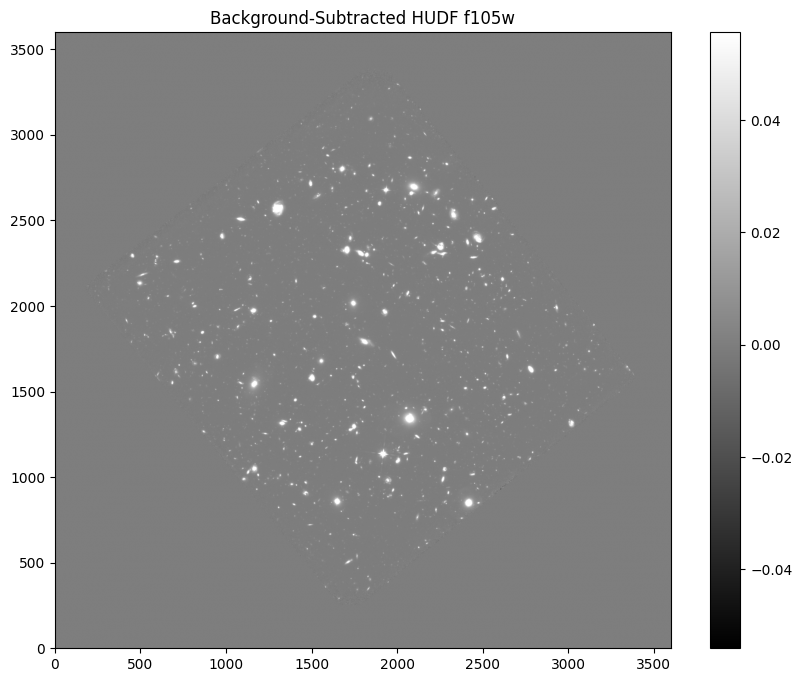

In [9]:
# subtract background
data_sub = data64 - bkg

m2, s2 = np.mean(data_sub), np.std(data_sub)

plt.imshow(
    data_sub,
    cmap='gray',
    origin='lower',
    vmin=m2 - s2,
    vmax=m2 + s2
)
plt.colorbar()
plt.title("Background-Subtracted HUDF f105w")
plt.savefig("hudf_f105w_subtracted.png", dpi=150)
plt.show()



In [10]:
rms = bkg.rms()
snr = data_sub / rms
snr[~np.isfinite(snr)] = 0.0

/var/folders/fy/3pk1d99j45s5hzh138fynqx40000gn/T/ipykernel_91127/807176563.py:2: RuntimeWarning: invalid value encountered in divide
  snr = data_sub / rms


In [11]:
objects = sep.extract(snr, thresh=3.0)
print("Number of detected sources:", len(objects))


Number of detected sources: 6263


In [12]:
snr = data_sub / rms


/var/folders/fy/3pk1d99j45s5hzh138fynqx40000gn/T/ipykernel_91127/2311870163.py:1: RuntimeWarning: invalid value encountered in divide
  snr = data_sub / rms


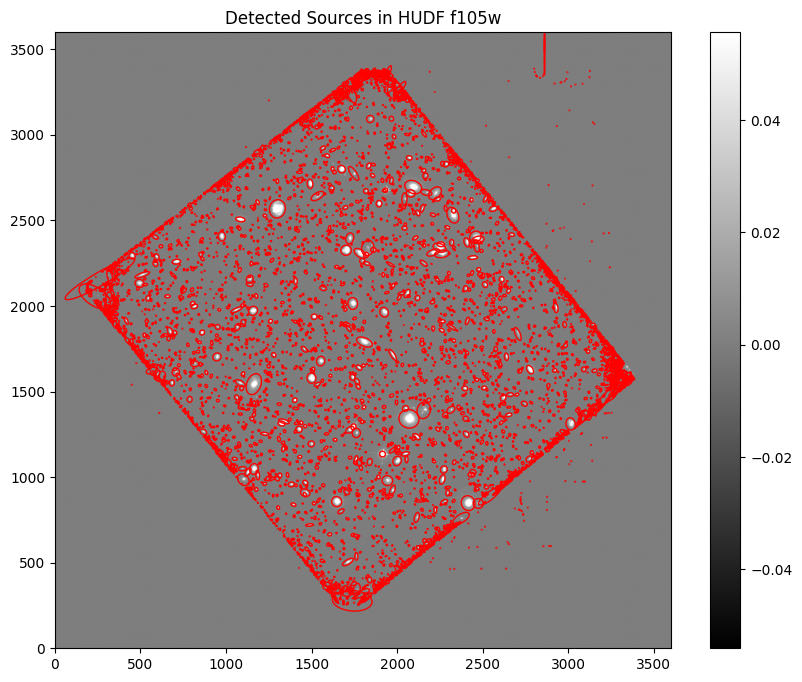

In [13]:
plt.imshow(
    data_sub,
    cmap='gray',
    origin='lower',
    vmin=m2 - s2,
    vmax=m2 + s2
)
plt.colorbar()
plt.title("Detected Sources in HUDF f105w")

ax = plt.gca()

for obj in objects:
    x, y, a, b, theta = obj['x'], obj['y'], obj['a'], obj['b'], obj['theta']
    e = plt.matplotlib.patches.Ellipse(
        xy=(x, y),
        width=6*a,
        height=6*b,
        angle=theta * 180.0 / np.pi,
        fill=False,
        color='red',
        linewidth=1
    )
    ax.add_patch(e)

plt.savefig("hudf_f105w_detections.png", dpi=150)
plt.show()


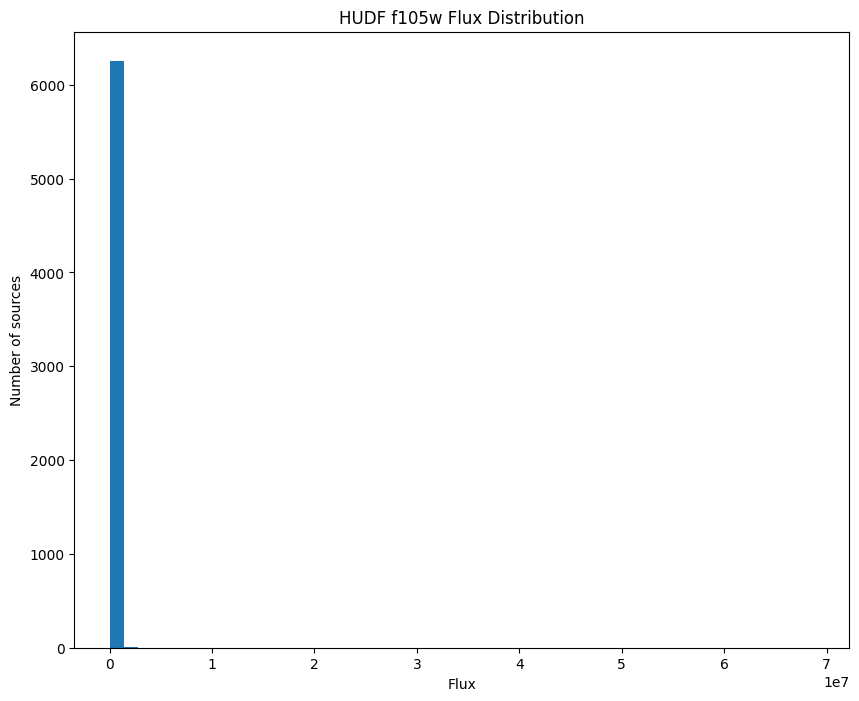

In [14]:
flux = objects['flux']

plt.hist(flux, bins=50)
plt.xlabel("Flux")
plt.ylabel("Number of sources")
plt.title("HUDF f105w Flux Distribution")
plt.savefig("hudf_f105w_flux_hist.png", dpi=150)
plt.show()
